In [153]:
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.measure import find_contours, label
from skimage.morphology import area_opening, disk, binary_closing

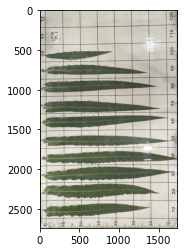

In [240]:
img = imread('../Agron845_project/img5.jpg')
plt.imshow(img)


In [241]:
# GEt bands
red = img[:, :, 0] #Extract matrix of red pixel values (m by n matrix)
green = img[:, :, 1] #Extract matrix of green pixel values
blue = img[:, :, 2]


In [243]:
red_green_ratio = red/green

# Calculate blue to green ratio for each pixel. The result is an m x n array.
blue_green_ratio = blue/green

# Excess green
ExG = 2*green - red - blue

# Classification of green pixels
bw = np.logical_and(red_green_ratio<0.99, blue_green_ratio<0.99, ExG>20) 



C:\Users\Luciam\AppData\Local\Temp\ipykernel_34132\2781578959.py:1: RuntimeWarning: divide by zero encountered in true_divide
  red_green_ratio = red/green
C:\Users\Luciam\AppData\Local\Temp\ipykernel_34132\2781578959.py:1: RuntimeWarning: invalid value encountered in true_divide
  red_green_ratio = red/green
C:\Users\Luciam\AppData\Local\Temp\ipykernel_34132\2781578959.py:4: RuntimeWarning: divide by zero encountered in true_divide
  blue_green_ratio = blue/green
C:\Users\Luciam\AppData\Local\Temp\ipykernel_34132\2781578959.py:4: RuntimeWarning: invalid value encountered in true_divide
  blue_green_ratio = blue/green


In [244]:
# Closing (performs a dilation followed by an erosion. Connect small bright patches)
bw = area_opening(bw, 1500)




In [245]:
bw = binary_closing(bw, disk(15))

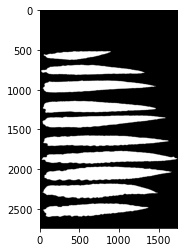

In [246]:
plt.imshow(bw, cmap="gray" )

In [247]:
bw.shape

(2740, 1735)

In [248]:
# Identify seed boundaries
contours = find_contours(bw, 0)

# Print number of seeds in image
print('Image contains',len(contours),'leaves')

Image contains 10 leaves


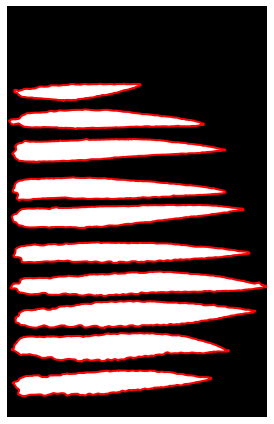

In [259]:
# Plot seed contours
plt.figure(figsize=(6,6))
plt.imshow(bw, cmap='gray')
plt.axis('off')
plt.tight_layout()

for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], '-r', linewidth=2)
    

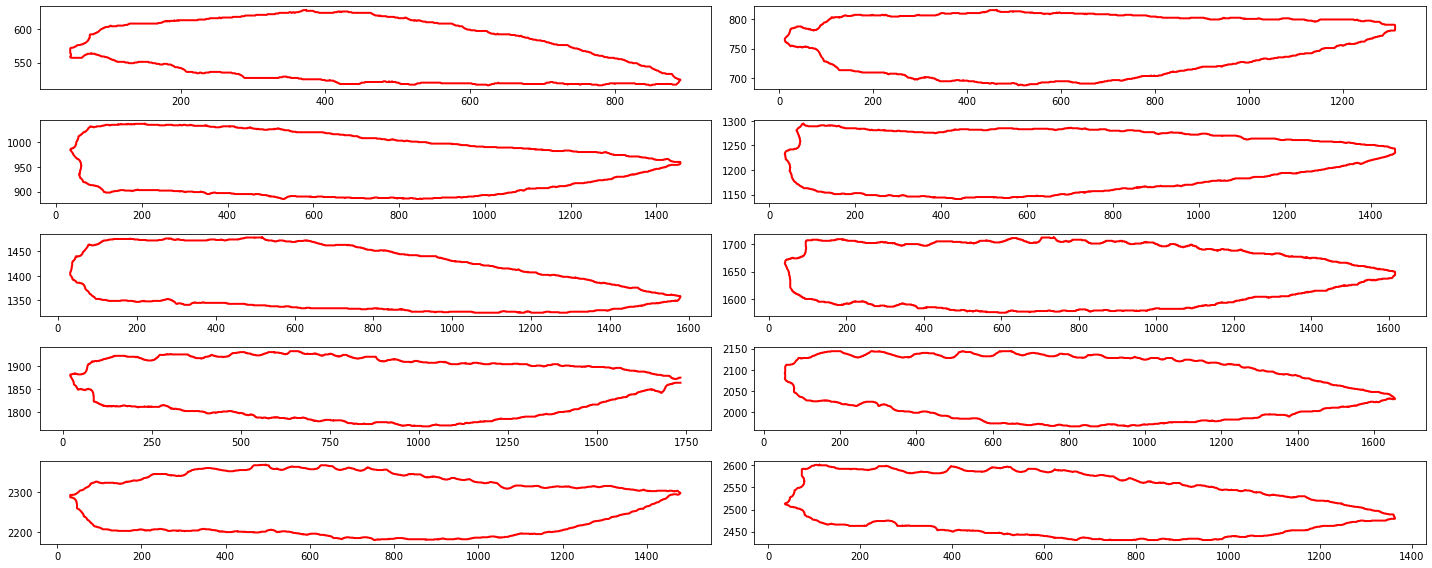

In [260]:
plt.figure(figsize=(20, 8))
for leave in range(10):
    plt.subplot(5,2,leave+1)
    plt.plot(contours[leave][:, 1], contours[leave][:, 0], '-r', linewidth=2)
    plt.tight_layout()
plt.show()

In [3]:
#import pillow library

from PIL import Image
import numpy as np

In [108]:
# load the image, using PIL get the number of pixels of width and height. 
#convert image in an array of 3d

img = Image.open('../Agron845_project/img1.jpg')

width , height = img.size
print(f"Width: {width}, height: {height}")

pixels = np.array(img)

img.show()

Width: 4032, height: 3024


In [109]:
pixels.shape

(3024, 4032, 3)

In [110]:
#using the blue tape of the picture delimit the image using a for loop
#first for gets into each row that contains several arrays (each pixel)
#secon for gets inside the pixel and compre the values with the limits i used
#blue = [30,75,160]
list = []
row_n = 0 #i am interedted to know row number not pixel data 
for row in pixels:
    for pixel in row:
        if pixel[0]>30 and pixel[0]<50 and pixel[1]>70 and pixel[1]<90 and pixel[2]>150 and pixel[2]>170:
            list.append(row_n)
    row_n +=1        

In [114]:
pixels[0][0]

array([33, 33, 25], dtype=uint8)

In [34]:
np.max(list)

1275

In [115]:
# Using the values of width and heigth, estimate the cropping area size.

box = (700, np.max(list), 3850, 3020)
img2 = img.crop(box)
# Check the image after cropping it to validate if the size is correct. 
# if not repeat the box step until it is.
img2.show()
new_width , new_height = img2.size
print(f"Width: {new_width}, height: {new_height}")

Width: 3150, height: 1746


In [ ]:
#green = [70-90,80-100,50-70]

In [80]:
#make a picture with only one leave to check if can crop leave
box = (2800, np.max(list), 3050, 3020)
img3 = img.crop(box)
# Check the image after cropping it to validate if the size is correct. 
# if not repeat the box step until it is.
width , height = img3.size
print(f"Width: {width}, height: {height}")

img3.show()

Width: 250, height: 1745


In [107]:
#make a picture with only one leave and some blank space on the top
box = (2800,0, 3050, 3020)
img4 = img.crop(box)
# Check the image after cropping it to validate if the size is correct. 
# if not repeat the box step until it is.

#width , height = img4.size
#print(f"Width: {width}, height: {height}")

#img4.show()

In [103]:
#used red_green_blue relation from canopy cover in Pynotes

pixels = np.array(img4)
list1 = []
pixel_total = []
row_n = 0 #i am interedted to know row number not pixel data 
pixel_n = 0
for row in pixels:
    for pixel in row:
        red = pixel[0]
        green = pixel[1]
        blue = pixel[2]
        red_green_ratio = red/green
        blue_green_ratio = blue/green
        ExG = 2*green - red - blue
        if red_green_ratio<0.95 and blue_green_ratio<0.95 and ExG>20:
            list1.append(row_n)
            pixel_n +=1
            pixel_total.append(pixel_n)
            
    row_n +=1    



C:\Users\Luciam\AppData\Local\Temp\ipykernel_34132\2366081452.py:11: RuntimeWarning: divide by zero encountered in ubyte_scalars
  red_green_ratio = red/green
C:\Users\Luciam\AppData\Local\Temp\ipykernel_34132\2366081452.py:12: RuntimeWarning: invalid value encountered in ubyte_scalars
  blue_green_ratio = blue/green


In [104]:
np.max(pixel_total)

165134

In [105]:
np.unique(list1)
#list2 = []
#[list2.append(row_n) for row_n in list1 if row_n not in list2]

array([1287, 1324, 1325, ..., 2978, 2979, 2980])

In [106]:
np.max(list1)

2980

In [93]:
np.min(list1)

1287

In [95]:
np.max(list1)-np.min(list1)

1693

In [96]:
box = (2800,np.min(list1), 3050, np.max(list1))
img4 = img.crop(box)
# Check the image after cropping it to validate if the size is correct. 
# if not repeat the box step until it is.
width , height = img4.size
print(f"Width: {width}, height: {height}")

img4.show()

Width: 250, height: 1693
